In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
data = pd.read_csv("dataset/job_skills.csv")
data.head()

,Company,Title,Category,Location,Responsibilities,Minimum Qualifications,Preferred Qualifications
0,Google,Google Cloud Program Manager,Program Management,Singapore,"Shape, shepherd, ship, and show technical prog...",BA/BS degree or equivalent practical experienc...,Experience in the business technology market a...
1,Google,"Supplier Development Engineer (SDE), Cable/Con...",Manufacturing & Supply Chain,"Shanghai, China",Drive cross-functional activities in the suppl...,BS degree in an Engineering discipline or equi...,"BSEE, BSME or BSIE degree.\nExperience of usin..."
2,Google,"Data Analyst, Product and Tools Operations, Go...",Technical Solutions,"New York, NY, United States",Collect and analyze data to draw insight and i...,"Bachelor’s degree in Business, Economics, Stat...",Experience partnering or consulting cross-func...
3,Google,"Developer Advocate, Partner Engineering",Developer Relations,"Mountain View, CA, United States","Work one-on-one with the top Android, iOS, and...",BA/BS degree in Computer Science or equivalent...,"Experience as a software developer, architect,..."
4,Google,"Program Manager, Audio Visual (AV) Deployments",Program Management,"Sunnyvale, CA, United States",Plan requirements with internal customers.\nPr...,BA/BS degree or equivalent practical experienc...,CTS Certification.\nExperience in the construc...


In [7]:
#See all the company
data.Company.value_counts()

Google     1227
YouTube      23
Name: Company, dtype: int64

In [8]:
#Exclude YouTube
data = data[data.Company != 'YouTube']

In [9]:
#See all the company
data.Company.value_counts()

Google    1227
Name: Company, dtype: int64

In [12]:
#Check null values
pd.isnull(data).sum()

Company                      0
Title                        0
Category                     0
Location                     0
Responsibilities            15
Minimum Qualifications      14
Preferred Qualifications    14
dtype: int64

In [13]:
#Drop null values
data = data.dropna(how='any', axis='rows')

In [14]:
#Check null values
pd.isnull(data).sum()

Company                     0
Title                       0
Category                    0
Location                    0
Responsibilities            0
Minimum Qualifications      0
Preferred Qualifications    0
dtype: int64

In [17]:
#Modify the column name
data = data.rename(columns={'Minimum Qualifications': 'Minimum_Qualifications', 'Preferred Qualifications': 'Preferred_Qualifications'})

In [19]:
data.head(1)

,Company,Title,Category,Location,Responsibilities,Minimum_Qualifications,Preferred_Qualifications
0,Google,Google Cloud Program Manager,Program Management,Singapore,"Shape, shepherd, ship, and show technical prog...",BA/BS degree or equivalent practical experienc...,Experience in the business technology market a...


In [22]:
#Degree requirements
Degree = ['BA', 'BS', 'Master', 'PhD', 'MBA']

Degrees = dict((x,0) for x in Degree)
for i in Degree:
    x = data['Minimum_Qualifications'].str.contains(i).sum()
    if i in Degrees:
        Degrees[i] = x

print(Degrees)

{'BA': 890, 'BS': 860, 'Master': 80, 'PhD': 8, 'MBA': 71}


In [23]:
degree_requiriment = sorted(Degrees.items(), key=lambda x: x[1], reverse=True)
degree = pd.DataFrame(degree_requiriment, columns=['Degree', 'Count'])
degree['Count'] = degree.Count.astype('float')
degree

,Degree,Count
0,BA,890.0
1,BS,860.0
2,Master,80.0
3,MBA,71.0
4,PhD,8.0


Text(0.5,0.98,'Degrees_Distribution')

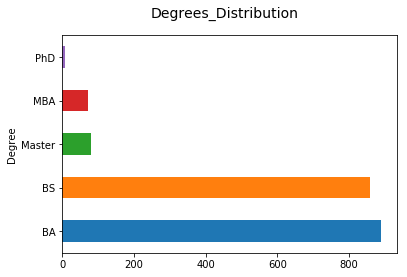

In [25]:
degree.plot.barh(x='Degree', y='Count', legend=False)
plt.suptitle('Degrees_Distribution', fontsize=14)

In [29]:
#Language Program required
Programming_Languages = ['Python', 'Java','C#', 'PHP', 'Javascript', 'Ruby', 'Perl', 'SQL','Go']

languages = dict((x,0) for x in Programming_Languages)
for i in languages:
    x = data['Minimum_Qualifications'].str.contains(i).sum()
    if i in languages:
        languages[i] = x

print(languages)

{'Python': 96, 'Java': 97, 'C#': 15, 'PHP': 7, 'Javascript': 3, 'Ruby': 14, 'Perl': 6, 'SQL': 69, 'Go': 98}


In [30]:
languages_requirement = sorted(languages.items(), key=lambda x: x[1], reverse=True)
language = pd.DataFrame(languages_requirement, columns=['Language', 'Count'])
language['Count'] = language.Count.astype('float')
language

,Language,Count
0,Go,98.0
1,Java,97.0
2,Python,96.0
3,SQL,69.0
4,C#,15.0
5,Ruby,14.0
6,PHP,7.0
7,Perl,6.0
8,Javascript,3.0


Text(0.5,0.98,'Languages Distribution')

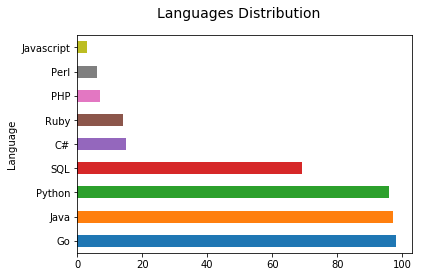

In [37]:
language.plot.barh(x='Language', y='Count', legend=False)
plt.suptitle('Languages Distribution', fontsize=14)

In [41]:
#Describe how to qualify to get a job at Google
df_DataAnalyst = data.loc[data.Title.str.contains('Data Analyst').fillna(False)]
df_DataAnalyst

,Company,Title,Category,Location,Responsibilities,Minimum_Qualifications,Preferred_Qualifications
2,Google,"Data Analyst, Product and Tools Operations, Go...",Technical Solutions,"New York, NY, United States",Collect and analyze data to draw insight and i...,"Bachelor’s degree in Business, Economics, Stat...",Experience partnering or consulting cross-func...
10,Google,"Data Analyst, Consumer Hardware",Product & Customer Support,"Mountain View, CA, United States",Build and maintain the Support Operations Anal...,"BA/BS degree in Computer Science, Engineering,...",Experience in designing and executing structur...
304,Google,"Data Analyst, Consumer Hardware",Product & Customer Support,"Mountain View, CA, United States",Build and maintain the Support Operations Anal...,"BA/BS degree in Computer Science, Engineering,...",Experience in designing and executing structur...
329,Google,"Data Analyst, Product Trust and Safety",Product & Customer Support,"Hyderabad, India",Excel at product policy enforcement on known s...,"Bachelor's degree in Engineering or Sciences, ...","BA/BS in Computer Science, Mathematics, Statis..."
438,Google,"Data Analyst, Trust and Safety",Product & Customer Support,"Sunnyvale, CA, United States",Perform statistical analyses on huge data sets...,"BS degree in Computer Science, Applied Mathema...","MS degree in Computer Science, Applied Mathema..."
458,Google,"Data Analyst, SMB Sales Growth Programs, Googl...",Sales Operations,"Sunnyvale, CA, United States",Work closely with SMB Online Sales team to ana...,BA/BS degree in coursework of a quantitative n...,"Experience with analytics and reporting, with ..."


In [46]:
Res_DA = ' '.join(df_DataAnalyst['Responsibilities'].tolist())
Res_DA

'Collect and analyze data to draw insight and identify strategic solutions.\nBuild consensus by facilitating broad collaboration with clear communication and documentation.\nWork with cross-functional stakeholders to gather requirements, manage implementation, and drive delivery of projects. Build and maintain the Support Operations Analytics infrastructure.\nCustomize and maintain tools to provide insights and visibility into key strategic and operational performance of the organization.\nDefine and action analysis on operational data sets to provide strategic recommendations to multiple levels of leadership; package analysis for reports and presentations to shape strategic and operational decisions.\nDraw insights from analyzing data to improve Support Operations quality and efficiency.\nContribute to strategic planning around product launches. Build and maintain the Support Operations Analytics infrastructure.\nCustomize and maintain tools to provide insights and visibility into key

In [55]:
#at anacomda prompt: conda install -c https://conda.anaconda.org/conda-forge wordcloud
#Generate image --- Microsoft Visual C++ 14.0 is required
!pip install wordcloud

You are using pip version 9.0.1, however version 10.0.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [88]:
!pip install PIL

  Could not find a version that satisfies the requirement PIL (from versions: )
No matching distribution found for PIL
You are using pip version 9.0.1, however version 10.0.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [89]:
from wordcloud import WordCloud, ImageColorGenerator
from PIL import Image

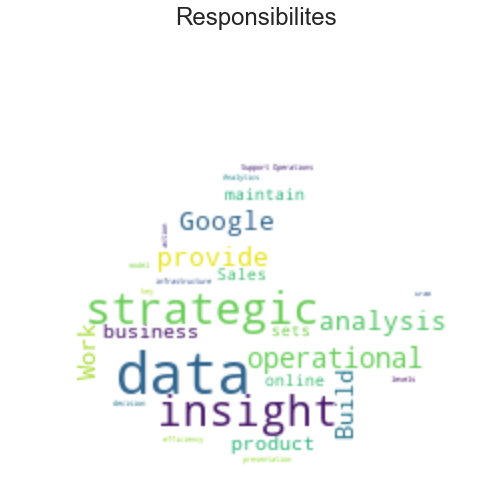

In [93]:
G = np.array(Image.open('wave.jpg'))
sns.set(rc={'figure.figsize':(11.7,8.27)})

wordcloud = WordCloud(mask=G,background_color="white").generate(Res_DA)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.margins(x=0, y=0)
plt.title('Responsibilites',size=24)
plt.show()